# Classification ascendante hiérarchique

## Import des bibliothèques

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import copy

Implantez une fonction renvoyant la distance euclidienne entre deux points. Ces points devront être de même dimension. Ils pourront être implanté comme une liste, un tuple, un tableau numpy unidirectionnel ou une Series.

In [2]:
def dist(p1,p2):
    p1=np.array(p1)
    p2=np.array(p2)
    return np.sqrt(sum(p1-p2)**2)

Exécutez la cellule suivante

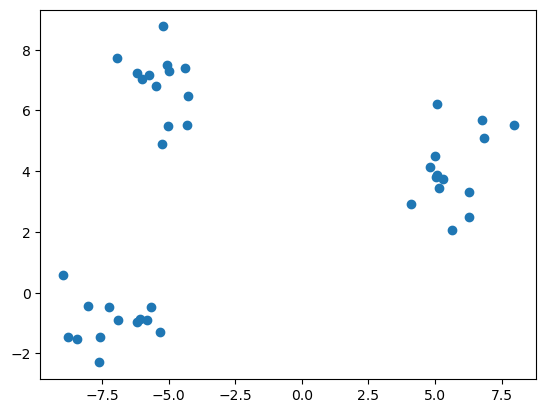

In [7]:
n_samples = 40
X, y = make_blobs(n_samples =n_samples)
X = pd.DataFrame(X, columns = ['abscisse','ordonnée'])
plt.figure()
plt.scatter(X['abscisse'],X['ordonnée'])

Etudiez l'aide de la fonction `make_blobs`. Puis faites varier les paramètres `n_spamples` et `centers` pour visualiser leur effets.

Nous allons implanter l'algorithme de classification ascendante hiérarchique petit à petit

Une partition est une répartition des points dans des groupes. Les groupes seront implantés par des listes. La partition est elle-même une liste des groupes.

Commencer par initialiser une partition (liste) dont les groupes (listes) contiendront chacun un des points de `X`. 

In [50]:
parti=[[i] for i in X.to_numpy()]

Implantez la fonction `single_link_distance` qui, prenant deux groupes `g1` et `g2` en paramètres, renvoie la plus petite distance entre un élément de `g1` et un élément de `g2`.

In [9]:
def single_link_distance(g1,g2):
    return min(dist(i,j) for i in g1 for j in g2)

Donnez l'instruction ou la séquence d'instructions qui, considérant une partition (ensemble de groupes), produit un dictionnaire dans lequel la clé est la distance (single_link_distance) entre deux groupes et la valeur associée est le tuple des indices des deux groupes entre lesquels cette distance est calculée.

In [34]:
dic={single_link_distance(parti[i],parti[j]):(i,j) for i in range(0,len(parti)) for j in range(i+1,len(parti))}

Considérant le dictionnaire précédent, donnez l'instruction ou la suite d'instructions qui renvoie l'indice des deux groupes les plus proches

In [47]:
def groupePlusProche(dic):
    return [dic.get(i) for i in dic.keys() if i==min([j for j in dic.keys()])][0]

Produisez une nouvelle partition en :
1. dupliquant la partition courante
1. lui retirant les deux groupes les plus proches
1. lui ajoutant la fusion des deux groupes 

In [52]:
fus=[np.append(parti[groupePlusProche(dic)[0]],parti[groupePlusProche(dic)[1]])]
parti.pop(groupePlusProche(dic)[0])
parti.pop(groupePlusProche(dic)[1])
parti.append(fus)

39

In [82]:
def fusione(parti,plusProche):
    fus=[np.append(parti[plusProche[0]],parti[plusProche[1]])]
    parti.pop(plusProche[0])
    parti.pop(plusProche[1])
    parti.append(fus)
    return parti

Itérez sur le traitement précédent en partant de la partition initiale dans laquel chaque groupe contient un unique élément, jusqu'à ce que la partition ne contienne plus qu'un seul groupe. Ajoutez chaque partition produite à une liste `partitions`.

In [14]:
partit=[[i] for i in X.to_numpy()]
partitions=copy.deepcopy(parti)
while len(parti)>1:
    dis={single_link_distance(partit[i],partit[j]):(i,j) for i in range(0,len(partit)) for j in range(i+1,len(partit))}
    partit=fusione(partit,dis.get(min(dis.keys())))
    temp=copy.deepcopy(partit)
    partitions.append(temp)

NameError: name 'fusione' is not defined

Visualisez les différentes partitions avec le code suivant.

In [13]:
for p in partitions:
    plt.figure()
    for g in p:
        plt.scatter([x[0] for x in g],[x[1] for x in g])

NameError: name 'partitions' is not defined

Intégrer la production de la séquence de partitions dans une fonction `CAH` recevant la liste des points.

Implantez d'autres distances entre groupes (complete linkage, average linkage,...) et modifiez la fonction CAH de sorte que la méthode utilisée pour le calcul entre groupe puisse lui être passée en paramètre.

Testez la CAH sur différents jeux de données avec différents paramètres.